In [1]:
install.packages("bnlearn")
install.packages("bnclassify")
q()
install.packages("e1071")
q()
install.packages("randomForest")
q()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘assertthat’, ‘entropy’, ‘matrixStats’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:

library(bnlearn)


data.grades<-read.table("2020_bn_nb_data.txt",head=TRUE)


head(data.grades)


,EC100,EC160,IT101,IT161,MA101,PH100,PH160,HS101,QP
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,BC,CC,BB,BC,CC,BC,AA,BB,y
2,CC,BC,BB,BB,CC,BC,AB,BB,y
3,AB,BB,AB,AB,BB,CC,BC,AB,y
4,BC,CC,BB,BB,BB,BB,BC,BB,y
5,BC,AB,CD,BC,BC,BC,BC,CD,y
6,DD,CC,DD,CD,CD,CC,BC,BC,n


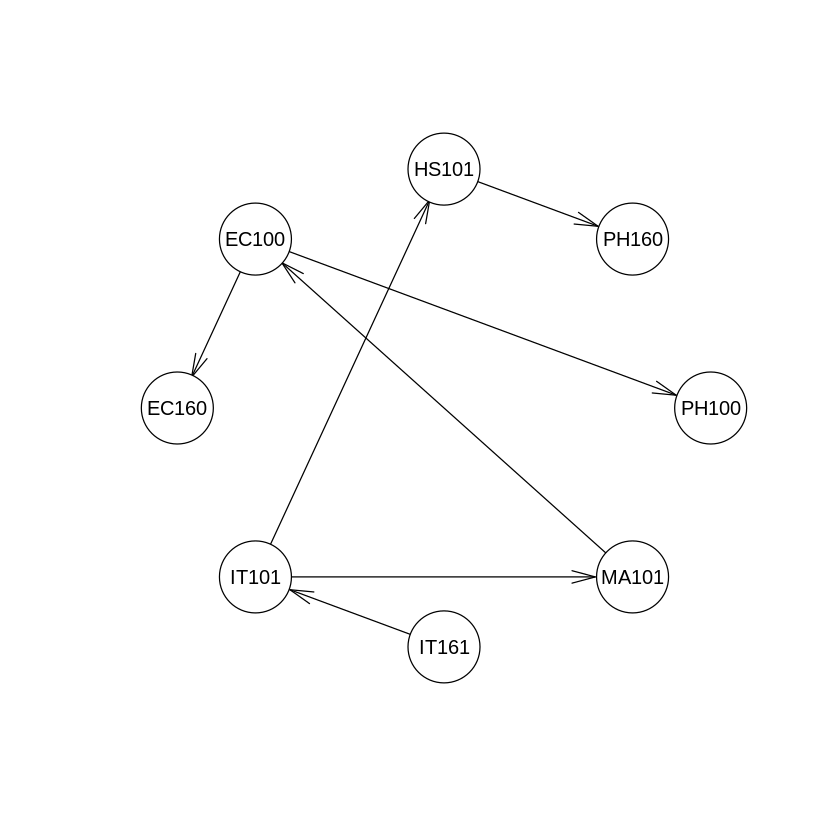

In [23]:


variables_to_convert <- c("EC100", "EC160", "IT101", "IT161", "MA101", "PH100", "PH160", "HS101", "QP")

data.grades[variables_to_convert] <- lapply(data.grades[variables_to_convert], as.factor)

data.grades.net<-hc(data.grades[,-9],score="k2")
plot(data.grades.net)

In [30]:



network <- hc(data, score = "k2")


In [31]:

network_fit <- bn.fit(network, data)

print(network_fit)


  Bayesian network parameters

  Parameters of node EC100 (multinomial distribution)

Conditional probability table:
 
     MA101
EC100         AA         AB         BB         BC         CC         CD
   AA 0.75000000 0.07692308 0.03846154 0.01851852 0.00000000 0.00000000
   AB 0.00000000 0.46153846 0.25000000 0.05555556 0.00000000 0.00000000
   BB 0.25000000 0.23076923 0.32692308 0.22222222 0.04081633 0.00000000
   BC 0.00000000 0.15384615 0.28846154 0.27777778 0.32653061 0.00000000
   CC 0.00000000 0.07692308 0.09615385 0.24074074 0.32653061 0.04166667
   CD 0.00000000 0.00000000 0.00000000 0.12962963 0.26530612 0.33333333
   DD 0.00000000 0.00000000 0.00000000 0.03703704 0.04081633 0.50000000
   F  0.00000000 0.00000000 0.00000000 0.01851852 0.00000000 0.12500000
     MA101
EC100         DD          F
   AA 0.00000000 0.00000000
   AB 0.00000000 0.00000000
   BB 0.00000000 0.00000000
   BC 0.00000000 0.00000000
   CC 0.00000000 0.00000000
   CD 0.04761905 0.00000000
   DD 0.190476

In [32]:

grades <- data.frame(EC100 = factor("DD", levels = levels(data$EC100)),
                     IT101 = factor("CC", levels = levels(data$IT101)),
                     MA101 = factor("CD", levels = levels(data$MA101)))


predicted_grade_PH100 <- predict(network_fit, node = "PH100", method = "bayes-lw", data = grades)


print(predicted_grade_PH100)

[1] CD
Levels: AA AB BB BC CC CD DD F


In [35]:

library(e1071)


course.grades <- read.table("2020_bn_nb_data.txt", header = TRUE)


course.grades <- data.frame(lapply(course.grades, as.factor))


num_repetitions <- 20


accuracy_values <- numeric(num_repetitions)


for (i in 1:num_repetitions) {

  set.seed(i)
  course.grades <- course.grades[sample(nrow(course.grades)), ]


  training_rows <- round(0.7 * nrow(course.grades))
  training_data <- course.grades[1:training_rows, ]
  testing_data <- course.grades[(training_rows + 1):nrow(course.grades), ]

  model <- naiveBayes(QP ~ ., data = training_data)


  predictions <- predict(model, testing_data)


  accuracy <- sum(predictions == testing_data$QP) / nrow(testing_data)


  accuracy_values[i] <- accuracy
  cat("Accuracy for repetition", i, ":", accuracy, "\n")


  confusion_matrix <- table(Predicted = predictions, Actual = testing_data$QP)

 
  cat("Confusion Matrix for repetition", i, ":\n")
  print(confusion_matrix)
  cat("\n")
}


average_accuracy <- mean(accuracy_values)


cat("Average Accuracy:", average_accuracy, "\n")


Accuracy for repetition 1 : 0.9714286 
Confusion Matrix for repetition 1 :
         Actual
Predicted  n  y
        n 23  0
        y  2 45

Accuracy for repetition 2 : 0.9714286 
Confusion Matrix for repetition 2 :
         Actual
Predicted  n  y
        n 17  0
        y  2 51

Accuracy for repetition 3 : 0.9714286 
Confusion Matrix for repetition 3 :
         Actual
Predicted  n  y
        n 22  1
        y  1 46

Accuracy for repetition 4 : 0.9714286 
Confusion Matrix for repetition 4 :
         Actual
Predicted  n  y
        n 19  1
        y  1 49

Accuracy for repetition 5 : 0.9857143 
Confusion Matrix for repetition 5 :
         Actual
Predicted  n  y
        n 22  0
        y  1 47

Accuracy for repetition 6 : 0.9857143 
Confusion Matrix for repetition 6 :
         Actual
Predicted  n  y
        n 22  0
        y  1 47

Accuracy for repetition 7 : 1 
Confusion Matrix for repetition 7 :
         Actual
Predicted  n  y
        n 18  0
        y  0 52

Accuracy for repetition 8 : 

In [36]:
library(randomForest)

course.grades <- read.table("2020_bn_nb_data.txt", header = TRUE)
course.grades <- data.frame(lapply(course.grades, as.factor))


num_repetitions <- 20
accuracy_values <- numeric(num_repetitions)


num_trees <- 500


for (i in 1:num_repetitions) {

  set.seed(i)
  course.grades <- course.grades[sample(nrow(course.grades)), ]


  training_rows <- round(0.7 * nrow(course.grades))
  training_data <- course.grades[1:training_rows, ]
  testing_data <- course.grades[(training_rows + 1):nrow(course.grades), ]


  model <- randomForest(QP ~ ., data = training_data, ntree = num_trees)
  predictions <- predict(model, testing_data)

  accuracy <- sum(predictions == testing_data$QP) / nrow(testing_data)

  accuracy_values[i] <- accuracy
  cat("Accuracy for repetition", i, ":", accuracy, "\n")
  confusion_matrix <- table(Predicted = predictions, Actual = testing_data$QP)
  cat("Confusion Matrix for repetition", i, ":\n")
  print(confusion_matrix)
  cat("\n")
}


average_accuracy <- mean(accuracy_values)


cat("Average Accuracy:", average_accuracy, "\n")


Accuracy for repetition 1 : 0.9857143 
Confusion Matrix for repetition 1 :
         Actual
Predicted  n  y
        n 25  1
        y  0 44

Accuracy for repetition 2 : 0.9857143 
Confusion Matrix for repetition 2 :
         Actual
Predicted  n  y
        n 18  0
        y  1 51

Accuracy for repetition 3 : 0.9571429 
Confusion Matrix for repetition 3 :
         Actual
Predicted  n  y
        n 22  2
        y  1 45

Accuracy for repetition 4 : 0.9428571 
Confusion Matrix for repetition 4 :
         Actual
Predicted  n  y
        n 18  2
        y  2 48

Accuracy for repetition 5 : 0.9571429 
Confusion Matrix for repetition 5 :
         Actual
Predicted  n  y
        n 21  1
        y  2 46

Accuracy for repetition 6 : 0.9428571 
Confusion Matrix for repetition 6 :
         Actual
Predicted  n  y
        n 22  3
        y  1 44

Accuracy for repetition 7 : 0.9428571 
Confusion Matrix for repetition 7 :
         Actual
Predicted  n  y
        n 18  4
        y  0 48

Accuracy for repetit